In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#IMPORTING FILE
ny= pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv',low_memory=False)

In [3]:
##REMOVING $ FROM COLUMNS AND SAVING AS FLOAT TYPE
def remove_money(money):
    return money[1:]
ny['Base Salary']=ny['Base Salary'].apply(remove_money).astype('float')

ny['Regular Gross Paid']=ny['Regular Gross Paid'].apply(remove_money).astype('float')

In [4]:
#NARROWING DOWN DATASET TO ACTIVE, SALARIED EMPLOYEES
leave = ny['Leave Status as of June 30'] =='ACTIVE'
annum = ny['Pay Basis'] =='per Annum'
annum_space= ny['Pay Basis'] ==' per Annum'
salaried= ny['Base Salary'] > 0 

ny= ny[leave & salaried & annum | annum_space]

In [5]:
#REMOVING UNNECESSARY COLUMNS FROM MY DATA BASE FOR EFFICIENCY: 
ny.drop(labels=[
    'Pay Basis',
    'Leave Status as of June 30',
    'Last Name',
    'First Name',
    'Mid Init',
     'OT Hours',
     'Total OT Paid',
      'Total Other Pay'],axis=1, inplace=True)

In [6]:
#SAVING AS DATE TIME DATA TYPE
ny['Agency Start Date']= pd.to_datetime(ny['Agency Start Date'],errors = 'coerce')

In [7]:
#RENAMING COLUMNS FOR EFFICIENCY 
##CHANGING NAMES OF COLUMNS
ny.columns = ['fiscal_year',
              'agency_name',  
              'ag_start_date',  
              'work_loc_borough', 
              'title_descr', 
              'base_salary', 
              'regular_hrs', 
              'regular_grs_paid', ]

In [8]:
#CREATING START YEAR MONTH AND DAY COLUMNS: 
ny['start_year']= ny.ag_start_date.dt.year.fillna(0).astype(int)
ny['start_month']=ny.ag_start_date.dt.month.fillna(0).astype(int)
ny['start_day']=ny.ag_start_date.dt.day.fillna(0).astype(int)

In [9]:
#CLEANING VALUES
ny['agency_name'] = ny['agency_name'].str.upper()
ny['work_loc_borough'] = ny['work_loc_borough'].str.upper()
ny['title_descr'] = ny['title_descr'].str.upper()

ny['agency_name'] = ny['agency_name'].str.strip()
ny['work_loc_borough'] = ny['work_loc_borough'].str.strip()
ny['title_descr'] = ny['title_descr'].str.strip()

In [10]:
#REMOVING OUTLIERS FOUND IN DATA ANALYSIS 
ny.drop(labels=[891220,1257108,1257109,1927771], axis=0, inplace=True)

In [11]:
#ADDING AVERAGE WEEKLY HOURS COLUMN
#*based on a 48 week year* 
ny['avg_weekly_hours'] = ny['regular_hrs']/48
ny['years_at_agency']= ny['fiscal_year']- ny['start_year']
ny['hrly_rate'] = ny['regular_grs_paid'] / ny['regular_hrs']

In [12]:
#SEABORN PALETTES 
sns.set_palette("Set2", 8)
sns.set_style('dark')

                                            DATA VISUALIZATION

## AGENCY

###### There are 156 total government agencies on the New York City Payroll with salaried employees.

In [13]:
len(ny.agency_name.value_counts())

156

###### It is important to note that the department of Education is split into three deparments. For this analysis, they will be combined into one agency, 'DEPARTMENT OF EDUCATION' : 

In [14]:
s = ny.agency_name.value_counts()
for index, value in s.items():
    if 'ED' in index: 
        print(index)
    elif 'EDUCATION' in index: 
        print(index)

DEPT OF ED PEDAGOGICAL
DEPT OF ED PARA PROFESSIONALS
DEPARTMENT OF EDUCATION ADMIN


In [15]:
#COMBINING ALL THREE INTO DEPARTMENT OF EDUCATION
ny.agency_name.replace(['DEPT OF ED PEDAGOGICAL',
                       'DEPT OF ED PARA PROFESSIONALS',
                        'DEPARTMENT OF EDUCATION ADMIN'],
                       ['DEPARTMENT OF EDUCATION',
                      'DEPARTMENT OF EDUCATION',
                      'DEPARTMENT OF EDUCATION'
                      ], inplace=True)

###### Which government agencies have the most employees?

Text(0, 0.5, 'Agency Name')

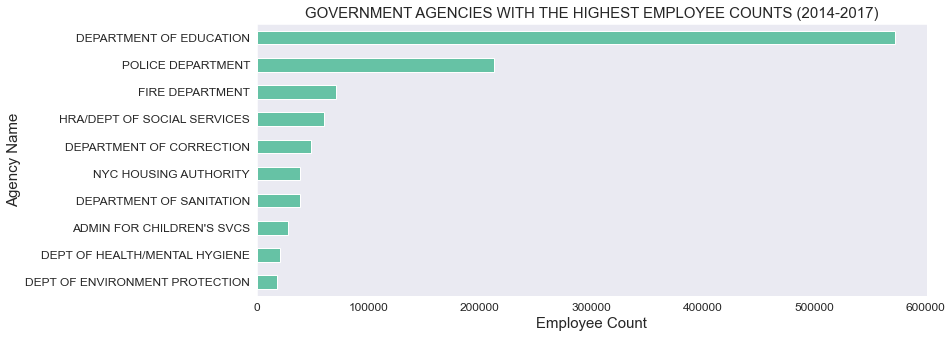

In [16]:
plt.figure(figsize=(12,5))
ny.agency_name.value_counts().head(10).sort_values().plot(kind='barh',fontsize=12)
plt.title('GOVERNMENT AGENCIES WITH THE HIGHEST EMPLOYEE COUNTS (2014-2017)',fontsize=15)
plt.xlabel('Employee Count',fontsize=15)
plt.ylabel('Agency Name',fontsize=15)

###### These agencies make up almost 86% of NYC's payroll. The other 14% are comprised of 146 other agencies. Because of this, this analysis will focus only on the employees in these 10 agencies.

In [17]:
work_for= ny.agency_name.value_counts().sort_values(ascending=False)
top_10= work_for[0:10].sum()
other_agencies= work_for[10:].sum()
employees_total= top_10+ other_agencies

In [18]:
#PERCENTAGE OF EMPLOYEES IN THOSE 10 AGENCIES
top_10 / employees_total * 100

85.86116220366534

Text(0.5, 1.0, 'Distribution of Employee Counts(2014-2017)')

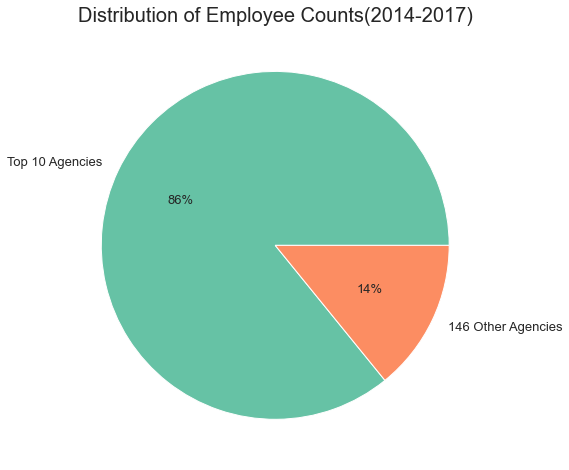

In [19]:
#PIE PLOT SHOWING PERCENTAGE
employees = pd.DataFrame([top_10,other_agencies], index=['Top 10 Agencies', '146 Other Agencies'], columns=[''])
employees.plot(kind='pie',subplots=True,legend=False,figsize=(8,8),fontsize=13,autopct='%1.f%%')
plt.title('Distribution of Employee Counts(2014-2017)',fontsize=20)

In [20]:
#SAVING NEW DF WITH ONLY THESE 10 AGENCIES
ed= ny.agency_name == 'DEPARTMENT OF EDUCATION'          
police= ny.agency_name == 'POLICE DEPARTMENT'
fire= ny.agency_name == 'FIRE DEPARTMENT'
social= ny.agency_name == 'HRA/DEPT OF SOCIAL SERVICES'
correction= ny.agency_name == 'DEPARTMENT OF CORRECTION'
house= ny.agency_name == 'NYC HOUSING AUTHORITY'
san= ny.agency_name == 'DEPARTMENT OF SANITATION'         
child= ny.agency_name == "ADMIN FOR CHILDREN'S SVCS"
mental= ny.agency_name == 'DEPT OF HEALTH/MENTAL HYGIENE'
envir= ny.agency_name == 'DEPT OF ENVIRONMENT PROTECTION'

ny_payroll = ny[ed |police| fire| social|correction| house|san|child|mental|envir]

In [21]:
ny_payroll.agency_name.value_counts()

DEPARTMENT OF EDUCATION           572280
POLICE DEPARTMENT                 212190
FIRE DEPARTMENT                    70734
HRA/DEPT OF SOCIAL SERVICES        59835
DEPARTMENT OF CORRECTION           48628
NYC HOUSING AUTHORITY              38927
DEPARTMENT OF SANITATION           38380
ADMIN FOR CHILDREN'S SVCS          28085
DEPT OF HEALTH/MENTAL HYGIENE      20916
DEPT OF ENVIRONMENT PROTECTION     18223
Name: agency_name, dtype: int64

# FISCAL YEAR 

Text(0, 0.5, 'Year')

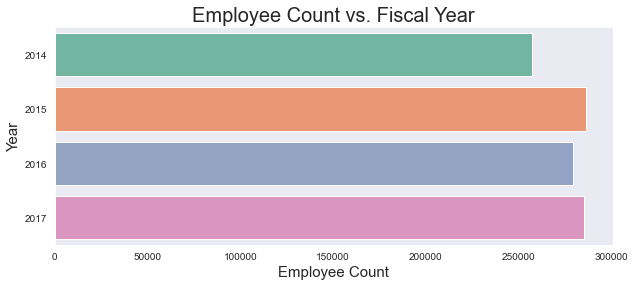

In [77]:
plt.figure(figsize=(10,4))
sns.countplot(
data=ny_payroll, 
y='fiscal_year'
)
plt.title('Employee Count vs. Fiscal Year', fontsize=20)
plt.xlabel('Employee Count',fontsize=15)
plt.ylabel('Year',fontsize=15)

([<matplotlib.axis.YTick at 0x7fd4ec982bb0>,
 [Text(0, 2500000000, '$2.5'),
  Text(0, 5000000000, '$5'),
  Text(0, 7500000000, '$7.5'),
  Text(0, 10000000000, '$10'),
  Text(0, 12500000000, '$12.5'),
  Text(0, 15000000000, '$15'),
  Text(0, 17500000000, '$17.5'),
  Text(0, 20000000000, '$20')])

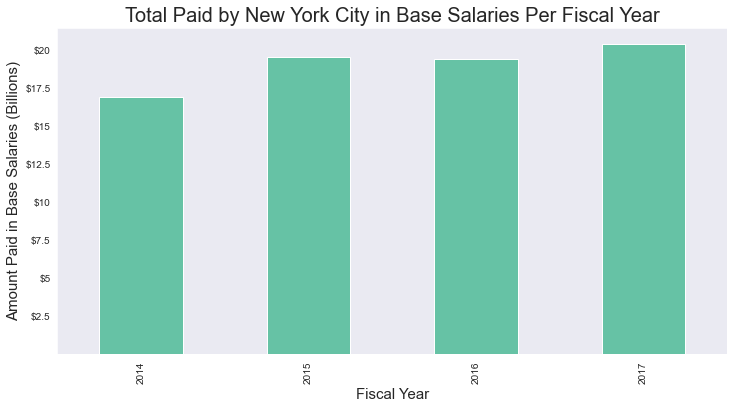

In [65]:
#TOTALS PAID IN BASE SALARY PER YEAR
plt.figure(figsize=(12,6))
ny_payroll.groupby('fiscal_year').base_salary.sum().plot(kind='bar')
plt.title('Total Paid by New York City in Base Salaries Per Fiscal Year',fontsize=20)
plt.xlabel('Fiscal Year', fontsize=15)
plt.ylabel('Amount Paid in Base Salaries (Billions)', fontsize=15)
plt.yticks([2500000000,5000000000,7500000000,10000000000,12500000000,15000000000,17500000000,20000000000],
           labels=['$2.5','$5','$7.5','$10','$12.5', 
                   '$15','$17.5','$20'])

# START DATE/MONTH/YEAR 

([<matplotlib.axis.YTick at 0x7fd498dd19a0>,
 [Text(0, 50000, '$50,000'),
  Text(0, 60000, '$60,000'),
  Text(0, 70000, '$70,000'),
  Text(0, 80000, '$80,000'),
  Text(0, 90000, '$90,000'),
  Text(0, 100000, '$100,000'),
  Text(0, 110000, '$110,000'),
  Text(0, 120000, '$120,000'),
  Text(0, 130000, '$130,000')])

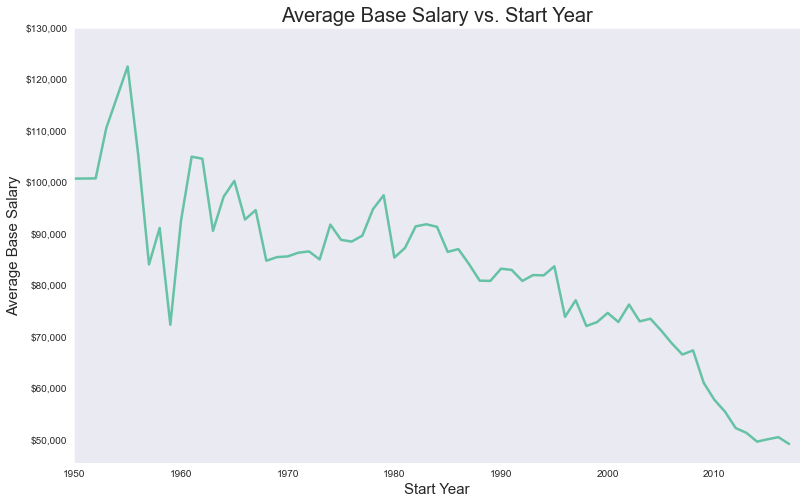

In [76]:
#START YEAR VS BASE SALARY
plt.figure(figsize=(13,8))
sns.lineplot( 
data=ny_payroll, 
x='start_year',
y='base_salary',
estimator='mean',
ci=None,
lw=2.5
)
plt.xlim(1950,2018)
plt.title("Average Base Salary vs. Start Year",fontsize=20)
plt.xlabel('Start Year',fontsize=15)
plt.ylabel('Average Base Salary',fontsize=15)
plt.yticks([50000,60000,70000,80000,90000,100000,110000,120000,130000],
           labels=['$50,000','$60,000','$70,000','$80,000','$90,000', 
                   '$100,000','$110,000','$120,000','$130,000'])

<Figure size 1080x576 with 0 Axes>

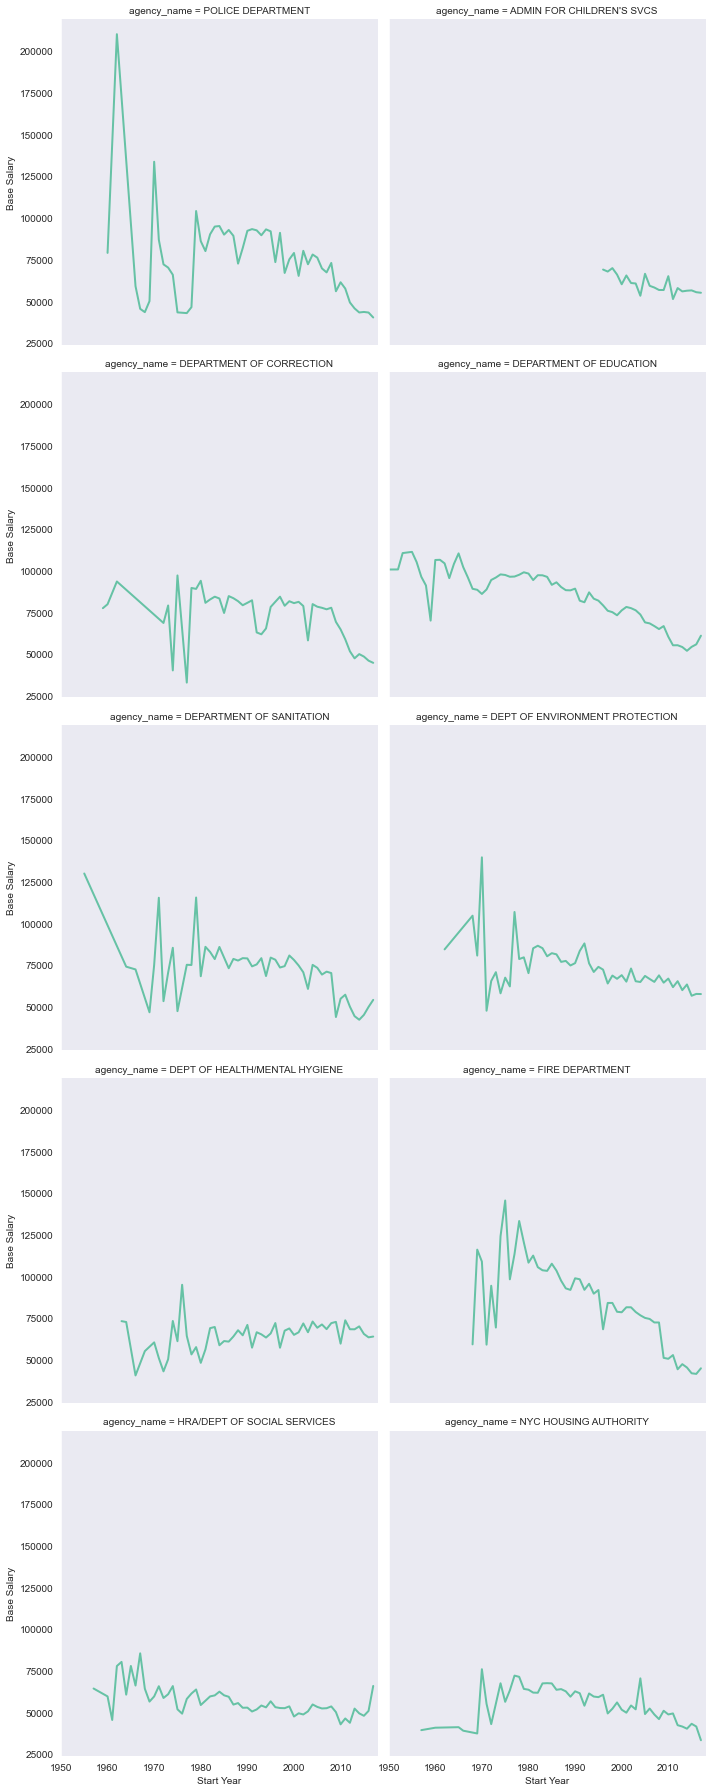

In [70]:
#START YEAR VS AVERAGE BASE SALARY BY AGENCY
plt.figure(figsize=(15,8))
year_agency= sns.relplot( 
kind='line',
data=ny_payroll, 
x='start_year', 
y='base_salary',
lw=2,
ci=None,
col='agency_name',
col_wrap=2)
plt.xlim(1950,2018)
year_agency.set_axis_labels("Start Year", "Base Salary")

Text(0, 0.5, 'Average Weekly Hours Worked')

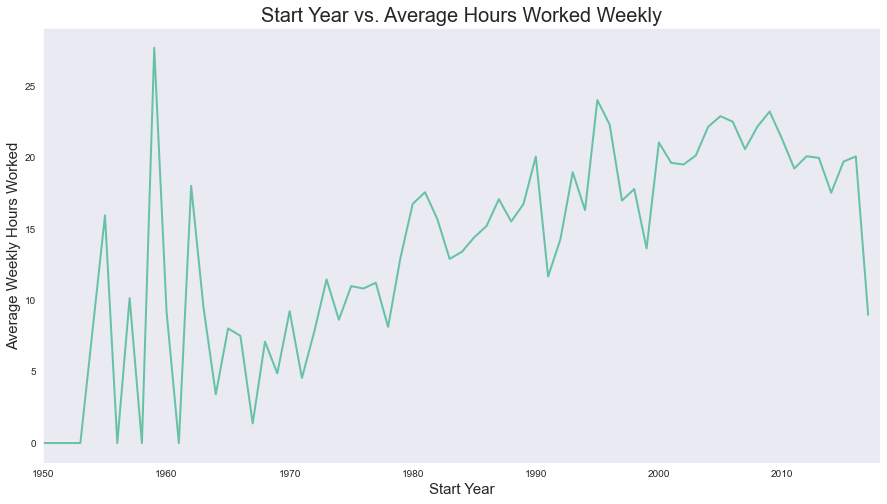

In [79]:
#START YEAR VS AVERAGE HOURS WORKED WEEKLY 
plt.figure(figsize=(15,8))
sns.lineplot( 
data=ny_payroll, 
x='start_year', 
y='avg_weekly_hours',
lw=2,
ci=None)
plt.xlim(1950,2018)
plt.title('Start Year vs. Average Hours Worked Weekly', fontsize=20)
plt.xlabel('Start Year', fontsize=15)
plt.ylabel('Average Weekly Hours Worked', fontsize=15)

Text(0, 0.5, 'Hourly Rate of Pay')

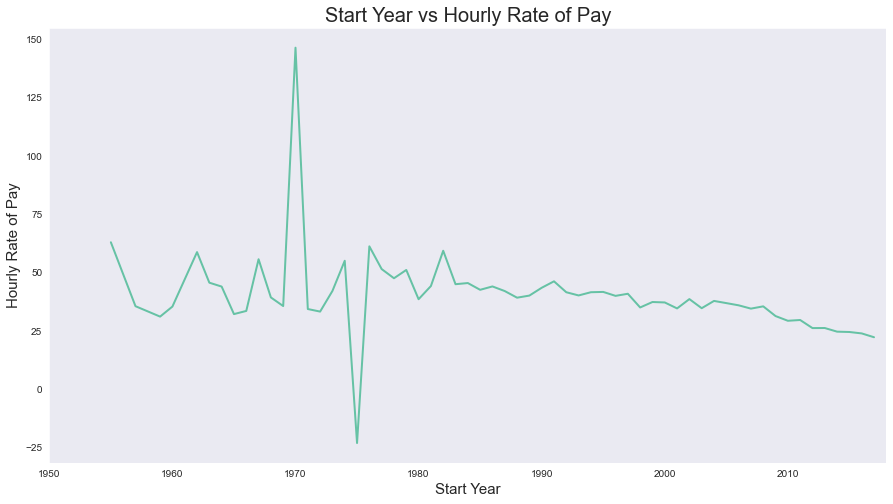

In [27]:
#START YEAR VS HOURLY RATE 
plt.figure(figsize=(15,8))
sns.lineplot( 
data=ny_payroll, 
x='start_year', 
y='hrly_rate',
lw=2,
ci=None)
plt.xlim(1950,2018)
plt.title('Start Year vs Hourly Rate of Pay', fontsize=20)
plt.xlabel('Start Year', fontsize=15)
plt.ylabel('Hourly Rate of Pay', fontsize=15)

Text(0, 0.5, 'Count')

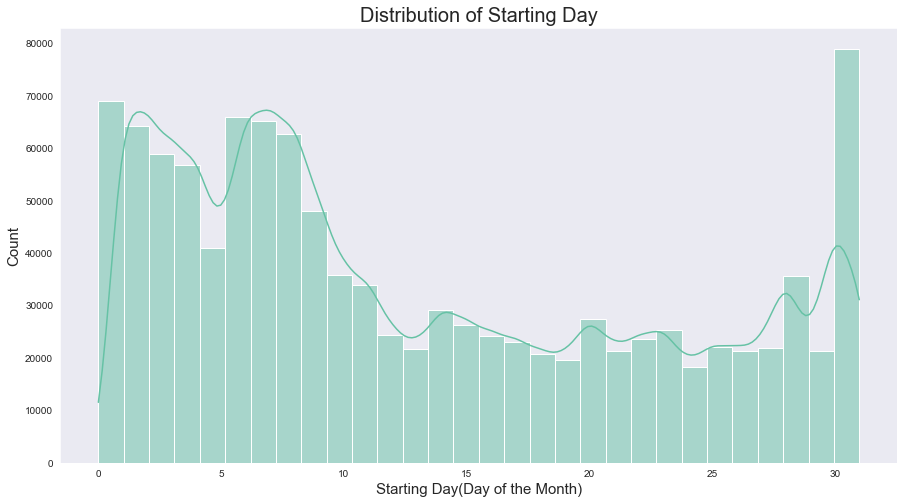

In [28]:
#DISTRIBUTION OF START DAYS
plt.figure(figsize=(15,8))
sns.histplot( 
data=ny_payroll, 
x='start_day',
bins=30,
kde=True,
)
plt.title('Distribution of Starting Day',fontsize=20)
plt.xlabel('Starting Day(Day of the Month)',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

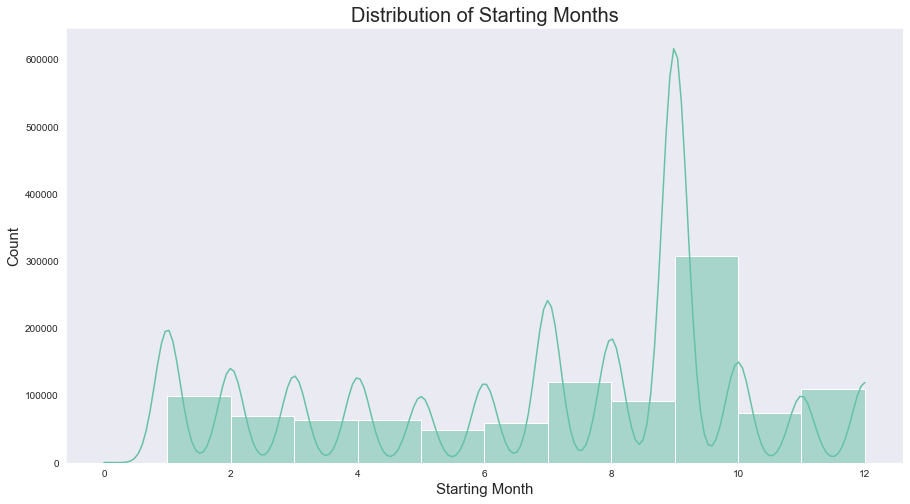

In [81]:
#DISTRIBUTION OF STARTING MONTH(MONTH HIRED)
plt.figure(figsize=(15,8))
sns.histplot( 
data=ny_payroll, 
x='start_month',
bins=12, 
kde=True
)
plt.title('Distribution of Starting Months',fontsize=20)
plt.xlabel('Starting Month',fontsize=15)
plt.ylabel('Count',fontsize=15)


Text(0, 0.5, 'Position')

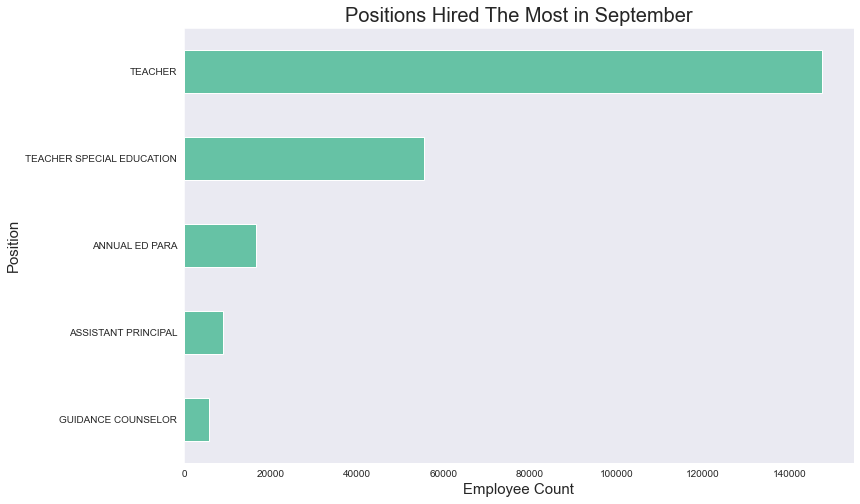

In [30]:
#WHO HIRED THE MOST IN THE MOST COMMON STARTING MONTH
plt.figure(figsize=(12,8))
ny_payroll[ny_payroll.start_month == 9].title_descr.value_counts().head().sort_values().plot(kind='barh')
plt.title('Positions Hired The Most in September',fontsize=20)
plt.xlabel('Employee Count', fontsize=15)
plt.ylabel('Position', fontsize=15)

Text(0, 0.5, 'Count')

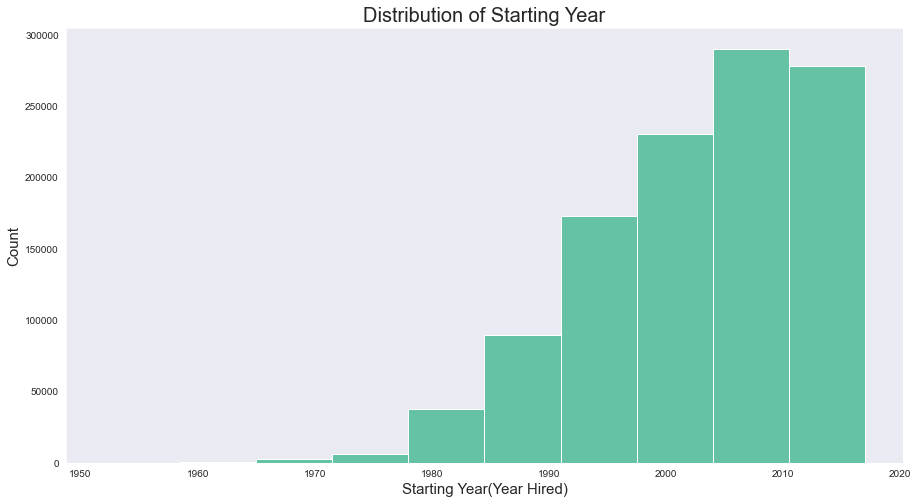

In [83]:
#DISTRIBUTION OF STARTING YEARS 
plt.figure(figsize=(15,8))
ny_payroll[ny_payroll.start_year > 0].start_year.plot(kind='hist')
plt.title('Distribution of Starting Year',fontsize=20)
plt.xlabel('Starting Year(Year Hired)',fontsize=15)
plt.ylabel('Count',fontsize=15)

# WORK BOROUGH

Text(0.5, 0, 'Borough')

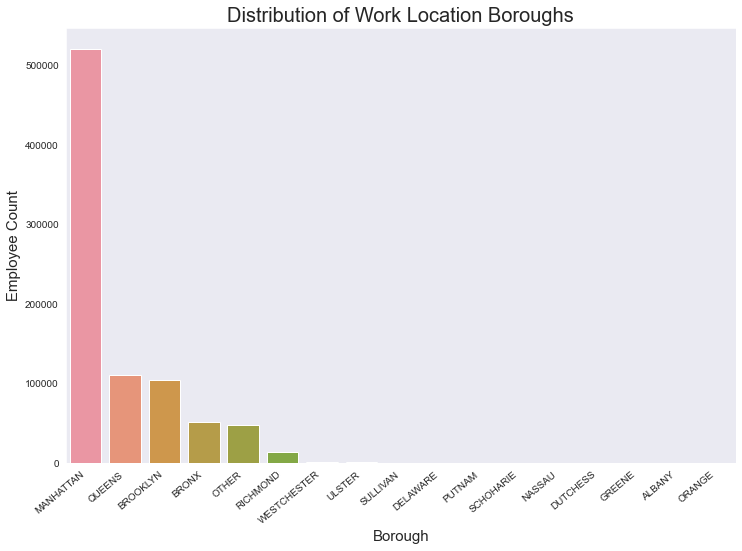

In [85]:
#WHICH LOCATION IS THE MOST COMMON IN GENERAL
plt.figure(figsize=(12,8))
ax= sns.countplot(
data=ny_payroll, 
x='work_loc_borough',
order= ny_payroll.work_loc_borough.value_counts().sort_values(ascending=False).index,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Work Location Boroughs', fontsize=20)
plt.ylabel('Employee Count', fontsize=15)
plt.xlabel('Borough', fontsize=15)

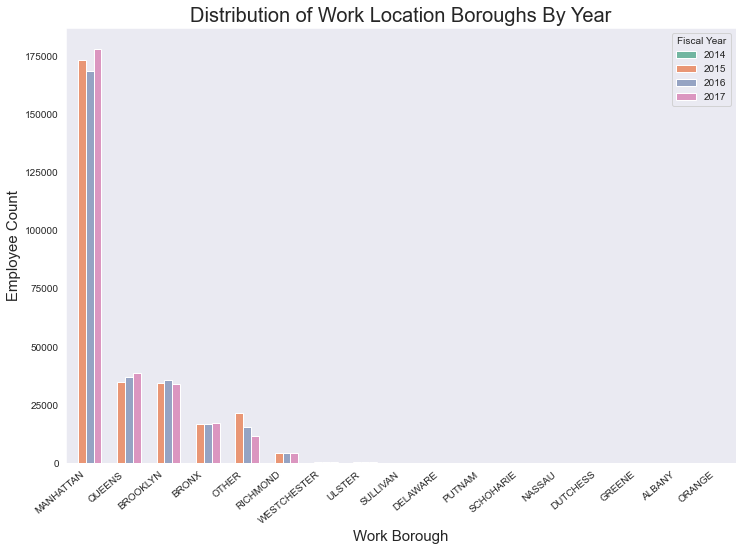

In [121]:
#WHICH LOCATION IS THE MOST COMMON FOR EACH YEAR
plt.figure(figsize=(12,8))
ax1= sns.countplot(
data=ny_payroll, 
x='work_loc_borough',
order= ny_payroll.work_loc_borough.value_counts().sort_values(ascending=False).index,
hue='fiscal_year')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Work Location Boroughs By Year', fontsize=20)
plt.ylabel('Employee Count', fontsize=15)
plt.xlabel('Work Borough', fontsize=15)
plt.legend(title='Fiscal Year')

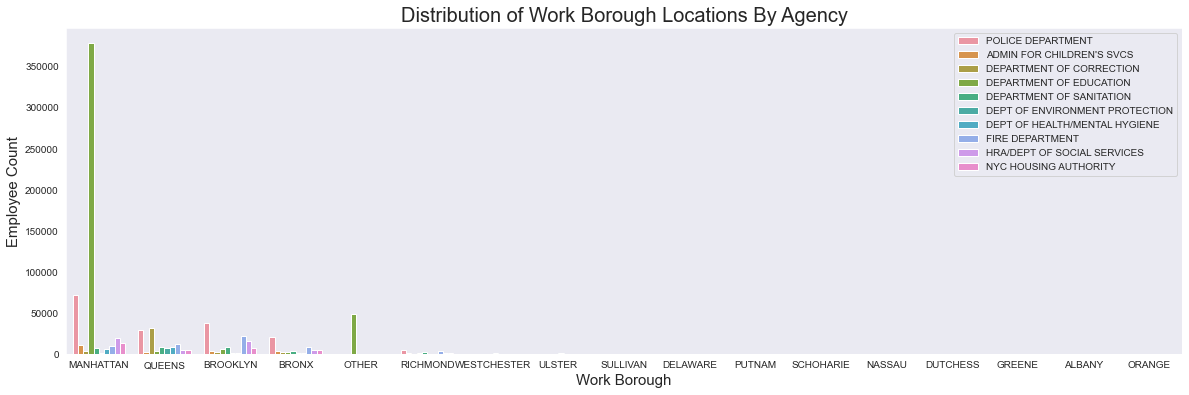

In [119]:
plt.figure(figsize=(20,6))
sns.countplot(
data=ny_payroll, 
x='work_loc_borough',
order= ny_payroll.work_loc_borough.value_counts().sort_values(ascending=False).index,
hue='agency_name')
plt.title('Distribution of Work Borough Locations By Agency', fontsize=20)
plt.ylabel('Employee Count', fontsize=15)
plt.xlabel('Work Borough', fontsize=15)
plt.legend(loc='upper right')

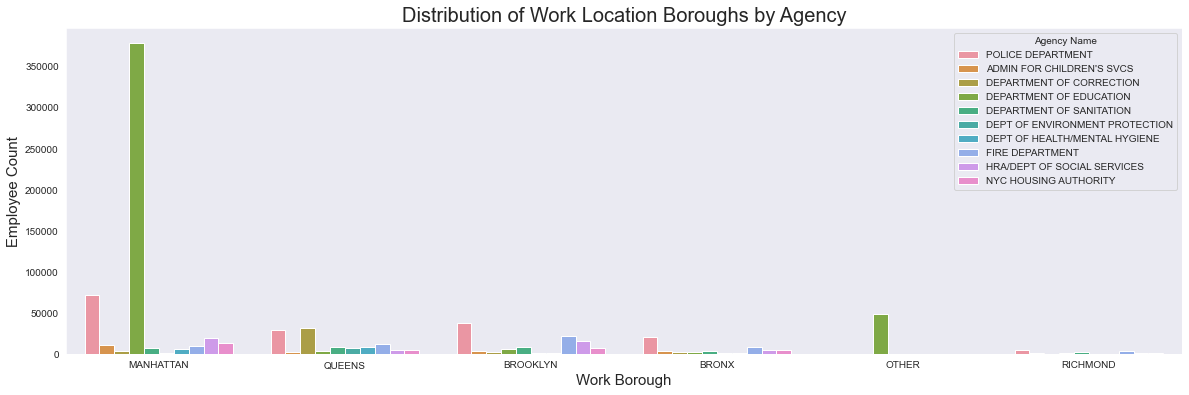

In [123]:
#ZOOMED IN LOOK AT MOST POPULAR BOROUGHS TO WORK IN 
plt.figure(figsize=(20,6))
sns.countplot(
data=ny_payroll, 
x='work_loc_borough',
order= ny_payroll.work_loc_borough.value_counts().sort_values(ascending=False)[:6].index,
hue='agency_name')
plt.title('Distribution of Work Location Boroughs by Agency', fontsize=20)
plt.ylabel('Employee Count', fontsize=15)
plt.xlabel('Work Borough', fontsize=15)
plt.legend(loc='upper right', title='Agency Name')

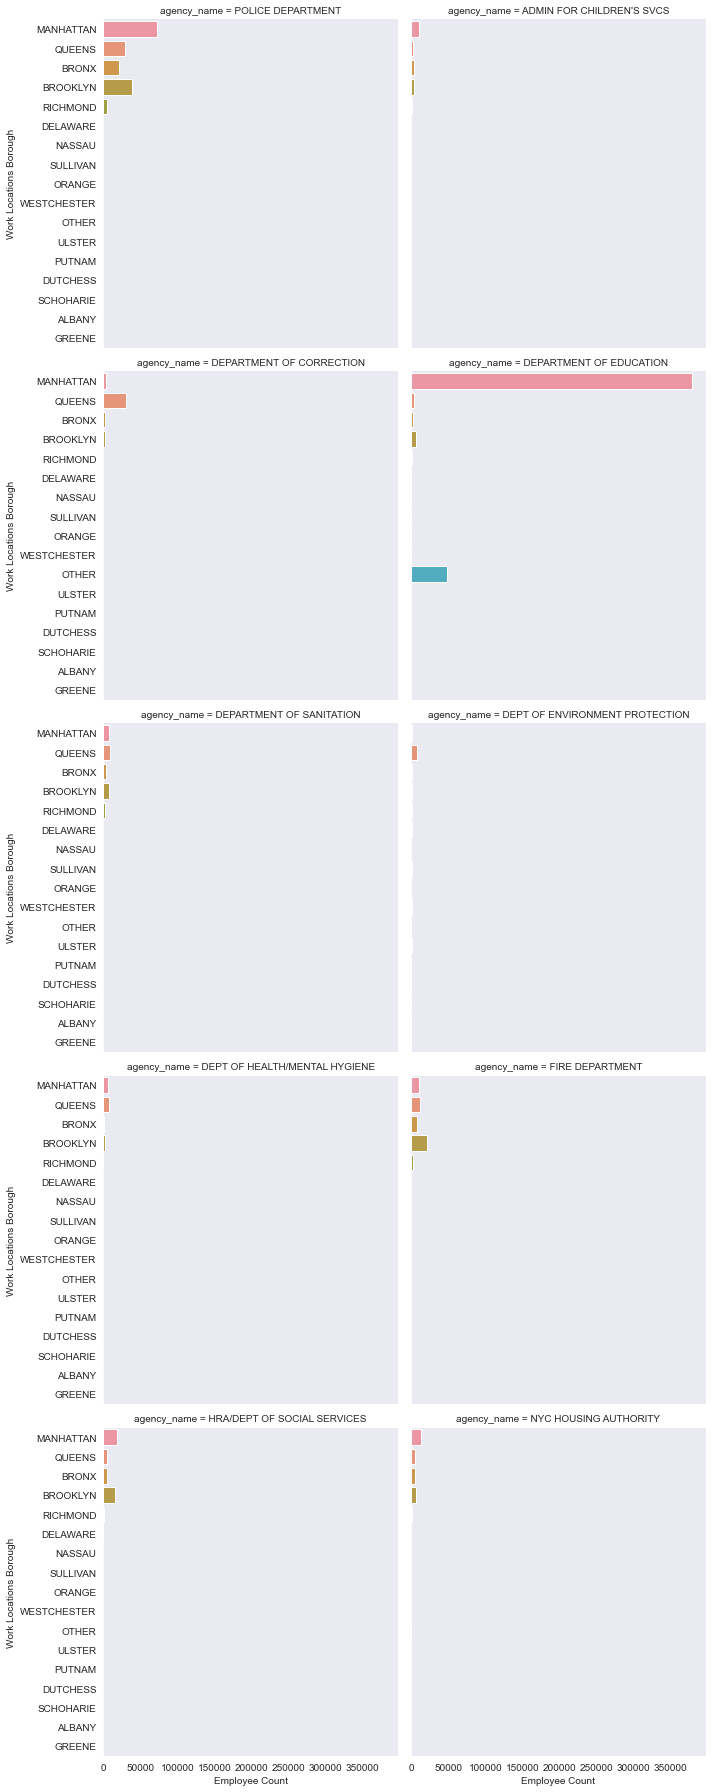

In [40]:
#EMPLOYEE COUNT IN EACH BOROUGH BY GOVERNMENT AGENCY
ax2= sns.catplot( 
kind='count', 
data=ny_payroll, 
y='work_loc_borough',
col='agency_name',
col_wrap=2,)
ax2.set_axis_labels("Employee Count", "Work Locations Borough")

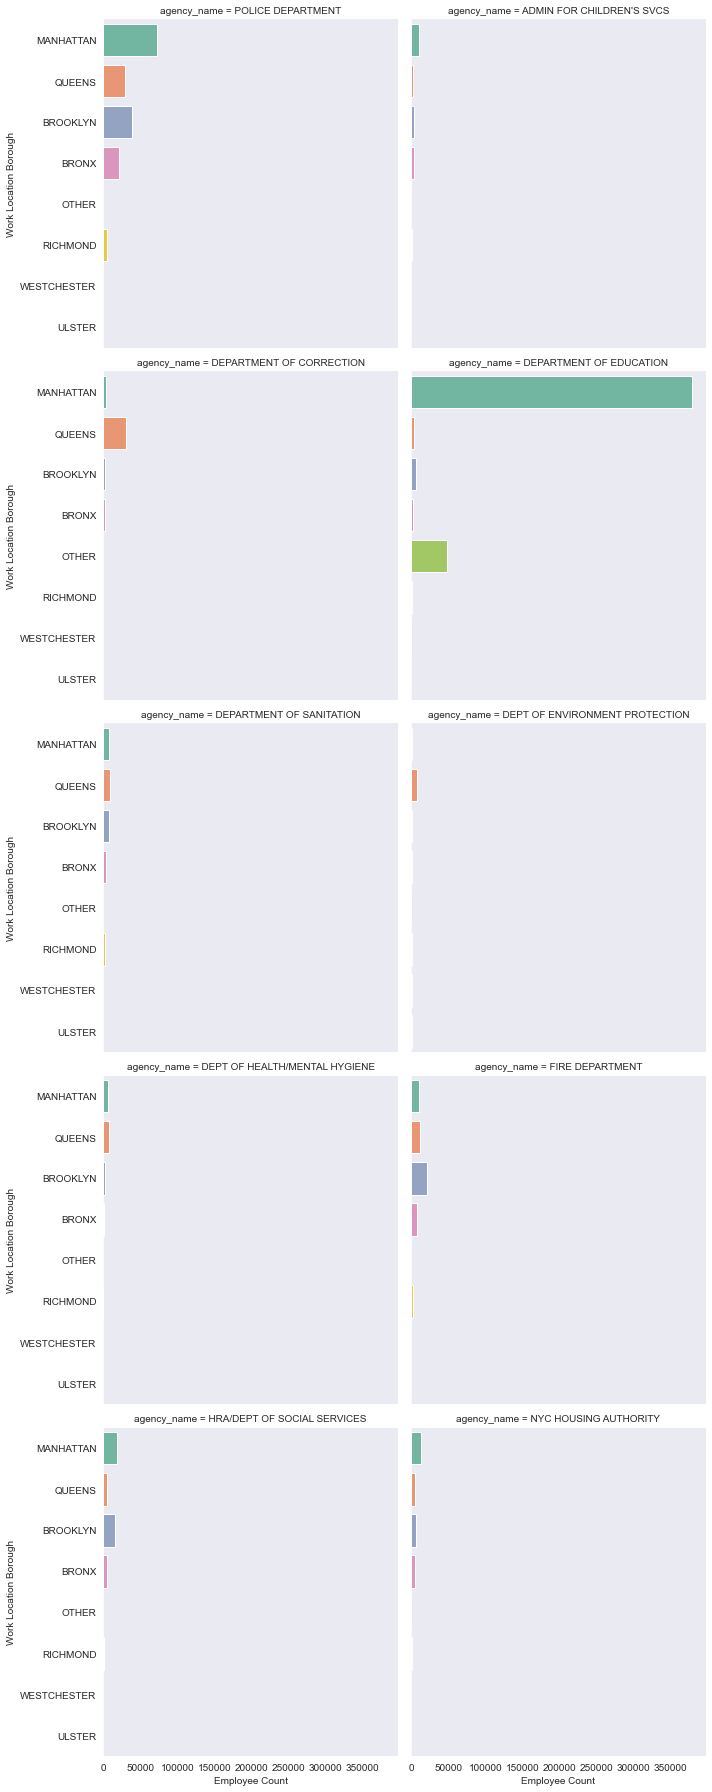

In [41]:
#CLOSER LOOK AT THE 8 MOST POPULAR BOROUGHS TO WORK IN COMPARED TO AGENCY
ax3 = sns.catplot( 
kind='count', 
data=ny_payroll, 
y='work_loc_borough',
order= ny_payroll.work_loc_borough.value_counts().sort_values(ascending=False)[:8].index,    
col='agency_name',
col_wrap=2,)
ax3.set_axis_labels("Employee Count", "Work Location Borough")

# JOB TITLE

Text(0, 0.5, 'Employee Count')

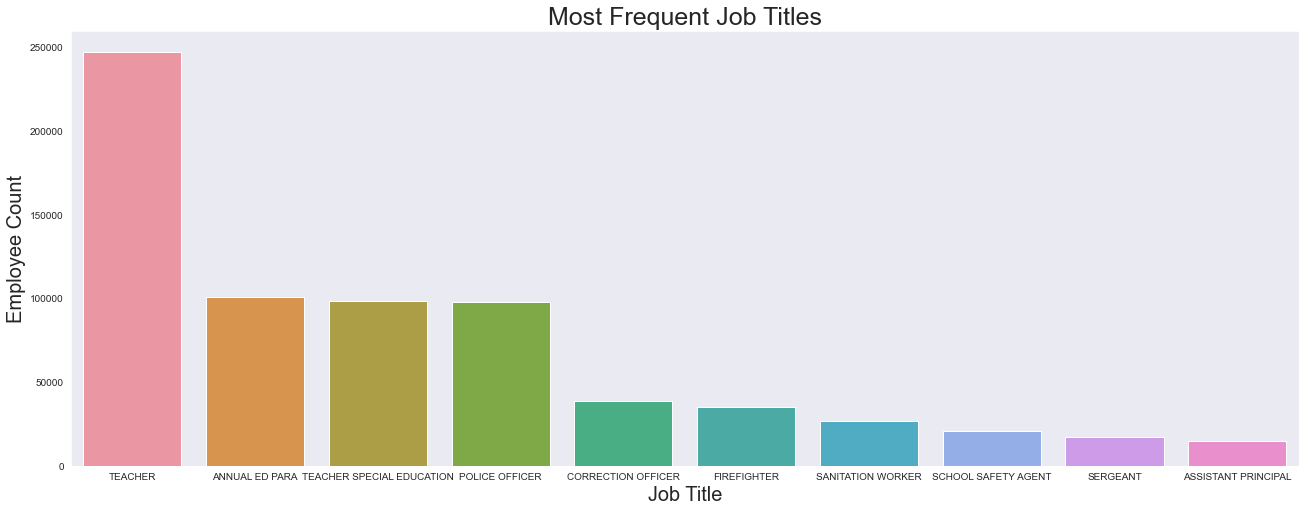

In [86]:
#MOST FREQUENT JOB POSITION

plt.figure(figsize=(22,8))
sns.countplot(
data=ny_payroll, 
x='title_descr',
order=ny_payroll.title_descr.value_counts()[:10].index,
)
plt.title('Most Frequent Job Titles', fontsize=25)
plt.xlabel('Job Title',fontsize=20)
plt.ylabel('Employee Count',fontsize=20)

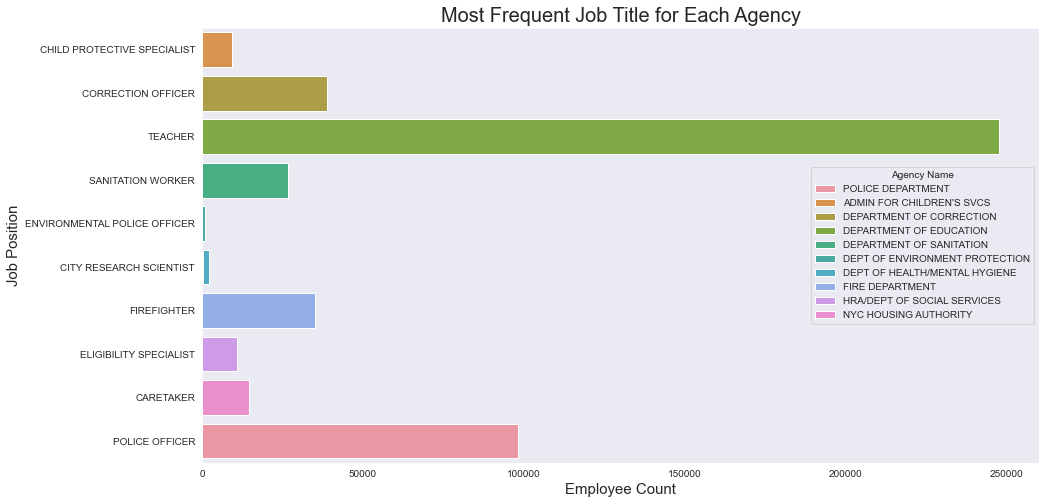

In [118]:
#MOST COMMON POSITION FOR EACH AGENCY 
plt.figure(figsize=(15,8))
sns.countplot(
data=ny_payroll ,
y='title_descr',
order=ny_payroll.groupby('agency_name').title_descr.agg(pd.Series.mode).values,
hue='agency_name',
dodge=False)
plt.title('Most Frequent Job Title for Each Agency',fontsize=20)
plt.ylabel('Job Position', fontsize=15)
plt.xlabel('Employee Count',fontsize=15)
plt.legend(title='Agency Name', fontsize=10)

# BASE SALARY

Text(0.5, 0, 'Average Base Salary')

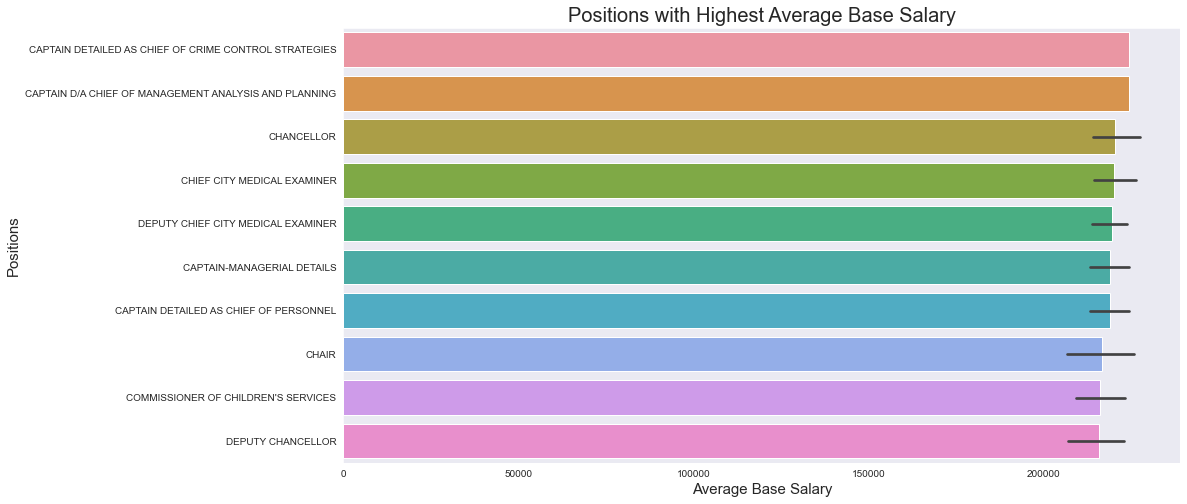

In [117]:
#WHICH POSITION HAS THE HIGHEST BASE SALARY
plt.figure(figsize=(15,8))
sns.barplot( 
data=ny_payroll, 
y='title_descr', 
x='base_salary',
order=ny_payroll.groupby('title_descr').base_salary.mean().sort_values(ascending=False).head(10).index
)
plt.title('Positions with Highest Average Base Salary',fontsize=20)
plt.ylabel('Positions',fontsize=15)
plt.xlabel('Average Base Salary',fontsize=15)

[Text(0, 0, 'TEACHER'),
 Text(1, 0, 'SANITATION WORKER'),
 Text(2, 0, 'POLICE OFFICER'),
 Text(3, 0, 'FIREFIGHTER'),
 Text(4, 0, 'ENVIRONMENTAL POLICE OFFICER'),
 Text(5, 0, 'ELIGIBILITY SPECIALIST'),
 Text(6, 0, 'CORRECTION OFFICER'),
 Text(7, 0, 'CITY RESEARCH SCIENTIST'),
 Text(8, 0, 'CHILD PROTECTIVE SPECIALIST'),
 Text(9, 0, 'CARETAKER')]

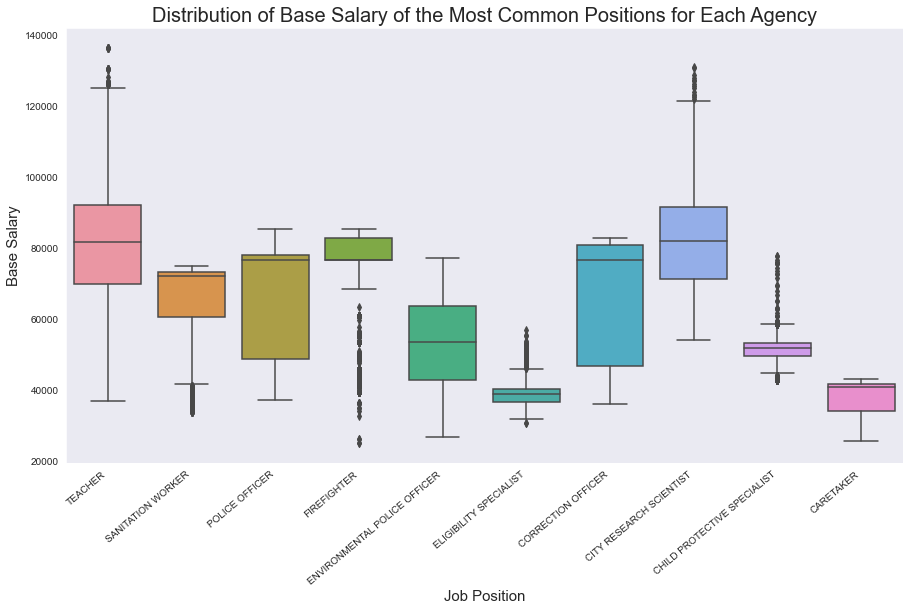

In [101]:
plt.figure(figsize=(15,8))
box_salary= sns.boxplot( 
data=ny_payroll,
x='title_descr',
y='base_salary',
order=ny_payroll.groupby('agency_name').title_descr.agg(pd.Series.mode).sort_values(ascending=False).values,
)
plt.title('Distribution of Base Salary of the Most Common Positions for Each Agency',fontsize=20)
plt.ylabel('Base Salary',fontsize=15)
plt.xlabel('Job Position', fontsize=15)

box_salary.set_xticklabels(box_salary.get_xticklabels(), rotation=40, ha="right")



[Text(0, 0, 'TEACHER'),
 Text(1, 0, 'SANITATION WORKER'),
 Text(2, 0, 'POLICE OFFICER'),
 Text(3, 0, 'FIREFIGHTER'),
 Text(4, 0, 'ENVIRONMENTAL POLICE OFFICER'),
 Text(5, 0, 'ELIGIBILITY SPECIALIST'),
 Text(6, 0, 'CORRECTION OFFICER'),
 Text(7, 0, 'CITY RESEARCH SCIENTIST'),
 Text(8, 0, 'CHILD PROTECTIVE SPECIALIST'),
 Text(9, 0, 'CARETAKER')]

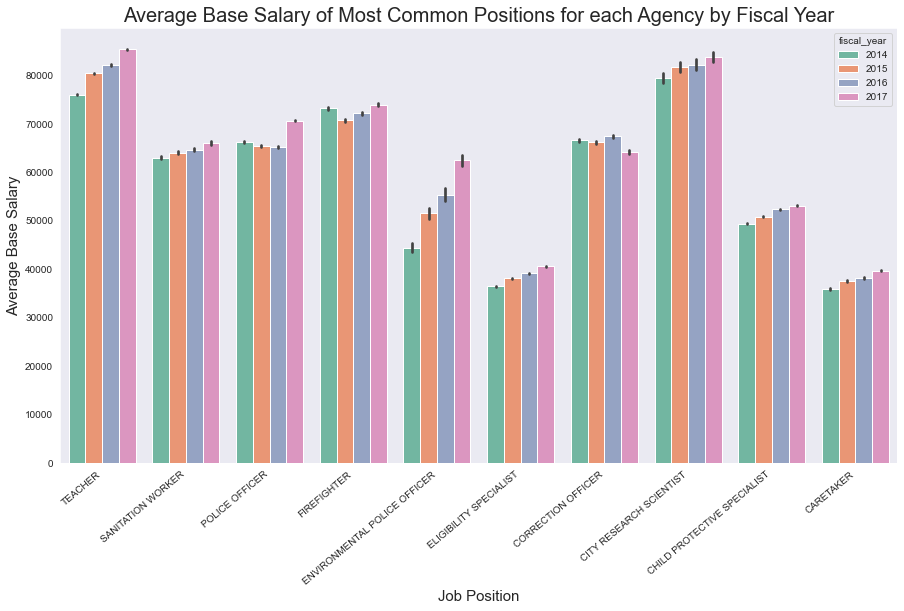

In [91]:
plt.figure(figsize=(15,8))
position= sns.barplot( 
data=ny_payroll,
x='title_descr',
y='base_salary',
order=ny_payroll.groupby('agency_name').title_descr.agg(pd.Series.mode).sort_values(ascending=False).values,
hue='fiscal_year'
)
plt.title('Average Base Salary of Most Common Positions for each Agency by Fiscal Year',fontsize=20)
plt.ylabel('Average Base Salary',fontsize=15)
plt.xlabel('Job Position', fontsize=15)
position.set_xticklabels(position.get_xticklabels(), rotation=40, ha="right")



[Text(0, 0, 'TEACHER'),
 Text(1, 0, 'SANITATION WORKER'),
 Text(2, 0, 'POLICE OFFICER'),
 Text(3, 0, 'FIREFIGHTER'),
 Text(4, 0, 'ENVIRONMENTAL POLICE OFFICER'),
 Text(5, 0, 'ELIGIBILITY SPECIALIST'),
 Text(6, 0, 'CORRECTION OFFICER'),
 Text(7, 0, 'CITY RESEARCH SCIENTIST'),
 Text(8, 0, 'CHILD PROTECTIVE SPECIALIST'),
 Text(9, 0, 'CARETAKER')]

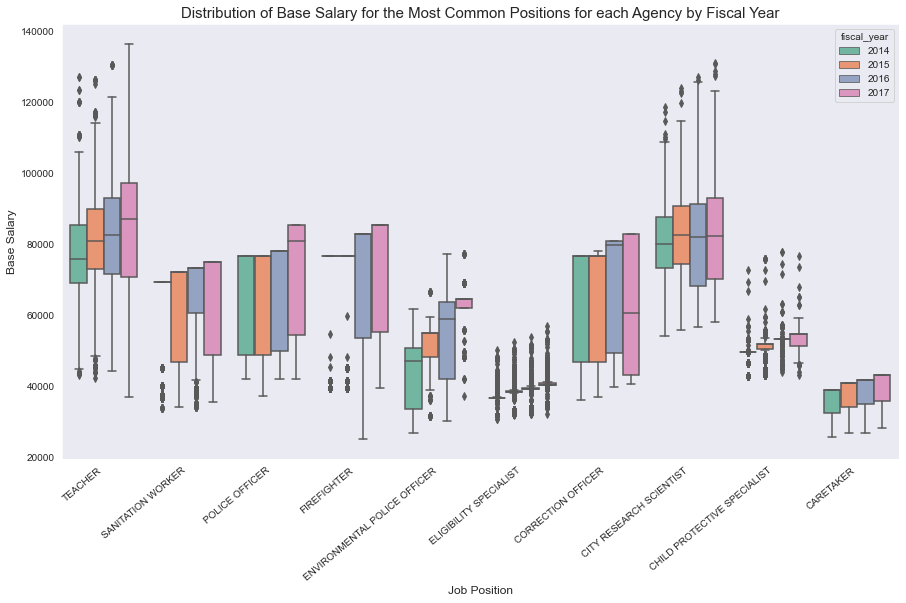

In [103]:
plt.figure(figsize=(15,8))
position2= sns.boxplot( 
data=ny_payroll,
x='title_descr',
y='base_salary',
order=ny_payroll.groupby('agency_name').title_descr.agg(pd.Series.mode).sort_values(ascending=False).values,
hue='fiscal_year'
)
plt.title('Distribution of Base Salary for the Most Common Positions for each Agency by Fiscal Year',fontsize=15)
plt.ylabel('Base Salary',fontsize=12)
plt.xlabel('Job Position', fontsize=12)
position2.set_xticklabels(position2.get_xticklabels(), rotation=40, ha="right")

Text(0, 0.5, 'Agency Name')

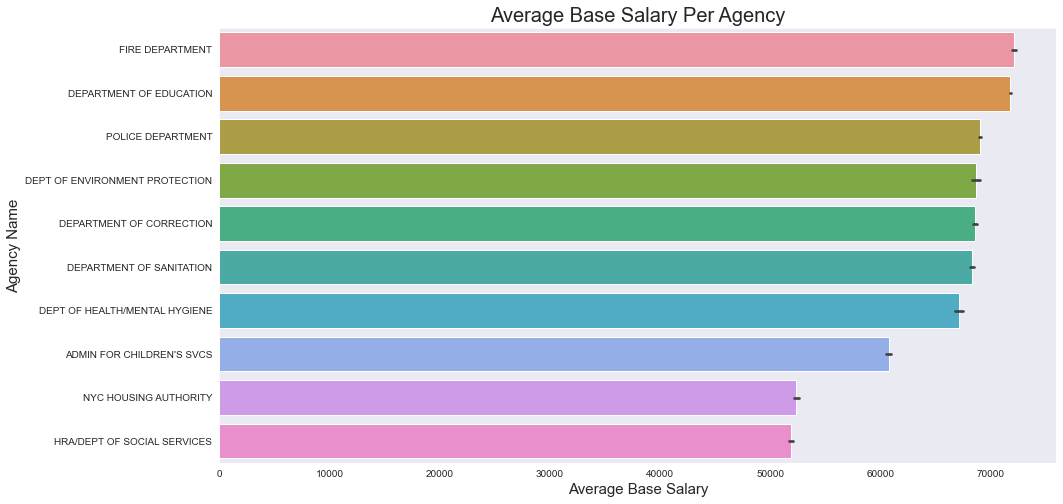

In [48]:
#AVERAGE BASE SALARY PER AGENCY 
plt.figure(figsize=(15,8))
sns.barplot( 
data=ny_payroll, 
y='agency_name', 
x='base_salary',
order= ny_payroll.groupby('agency_name').base_salary.mean().sort_values(ascending=False).index)
plt.title('Average Base Salary Per Agency', fontsize=20)
plt.xlabel('Average Base Salary', fontsize=15)
plt.ylabel('Agency Name', fontsize=15)

[Text(0, 0, 'FIRE DEPARTMENT'),
 Text(1, 0, 'DEPARTMENT OF EDUCATION'),
 Text(2, 0, 'POLICE DEPARTMENT'),
 Text(3, 0, 'DEPT OF ENVIRONMENT PROTECTION'),
 Text(4, 0, 'DEPARTMENT OF CORRECTION'),
 Text(5, 0, 'DEPARTMENT OF SANITATION'),
 Text(6, 0, 'DEPT OF HEALTH/MENTAL HYGIENE'),
 Text(7, 0, "ADMIN FOR CHILDREN'S SVCS"),
 Text(8, 0, 'NYC HOUSING AUTHORITY'),
 Text(9, 0, 'HRA/DEPT OF SOCIAL SERVICES')]

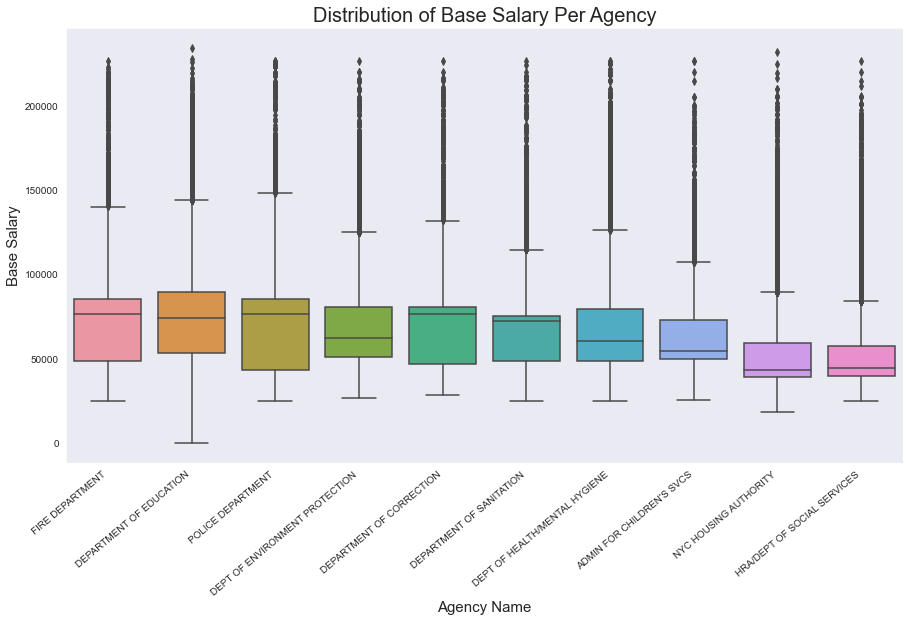

In [116]:
#DISTRIBUTION OF BASE SALARY PER AGENCY
plt.figure(figsize=(15,8))
agency_box = sns.boxplot( 
data=ny_payroll, 
x='agency_name', 
y='base_salary',
order= ny_payroll.groupby('agency_name').base_salary.mean().sort_values(ascending=False).index)
plt.title('Distribution of Base Salary Per Agency', fontsize=20)
plt.ylabel('Base Salary', fontsize=15)
plt.xlabel('Agency Name', fontsize=15)
agency_box.set_xticklabels(agency_box.get_xticklabels(), rotation=40, ha="right")

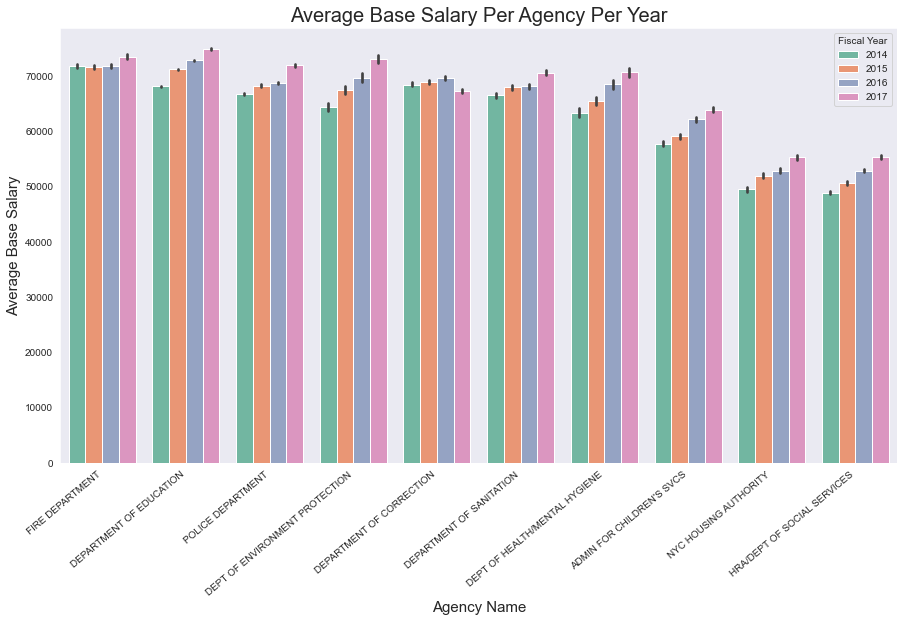

In [115]:
plt.figure(figsize=(15,8))
agency_pay=sns.barplot( 
data=ny_payroll, 
x='agency_name', 
y='base_salary',
order= ny_payroll.groupby('agency_name').base_salary.mean().sort_values(ascending=False).index,
hue='fiscal_year')
plt.title('Average Base Salary Per Agency Per Year', fontsize=20)
plt.ylabel('Average Base Salary', fontsize=15)
plt.xlabel('Agency Name', fontsize=15)
agency_pay.set_xticklabels(agency_pay.get_xticklabels(), rotation=40, ha="right")
plt.legend(title='Fiscal Year')

# WEEKLY HOURS

Text(0, 0.5, 'Average Weekly Hours')

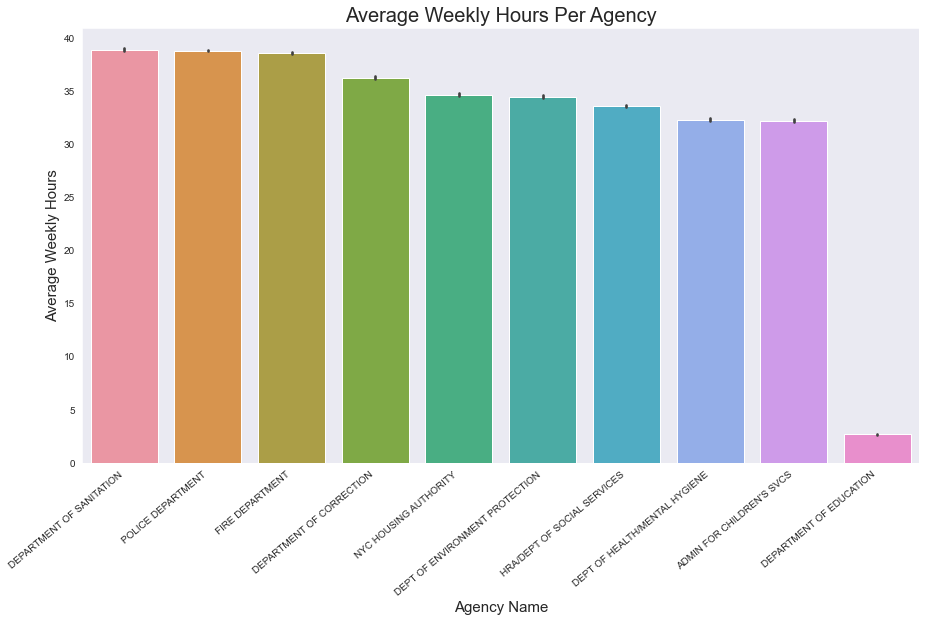

In [50]:
plt.figure(figsize=(15,8))
weekly_hrs=sns.barplot( 
data=ny_payroll, 
x='agency_name',
y='avg_weekly_hours',
order= ny_payroll.groupby('agency_name').avg_weekly_hours.mean().sort_values(ascending=False).index)
weekly_hrs.set_xticklabels(weekly_hrs.get_xticklabels(), rotation=40, ha="right")
plt.title('Average Weekly Hours Per Agency',fontsize=20)
plt.xlabel('Agency Name', fontsize=15)
plt.ylabel('Average Weekly Hours',fontsize=15)

In [51]:
### DEPARTMENT OF EDUCATION HAS QUITE A FEW 0.0 WEEKLY HOURS VALUES THAT ARE BRINGING THE AVERAGE DOWN
ny_payroll[ny_payroll.agency_name =='DEPARTMENT OF EDUCATION'].regular_hrs.value_counts()

0.00       526744
1825.00     16131
1830.00      5319
1664.00      4441
1650.28      1428
            ...  
1401.45         1
1584.97         1
1666.97         1
1222.00         1
1659.85         1
Name: regular_hrs, Length: 7997, dtype: int64

Text(0, 0.5, 'Average Weekly Hours')

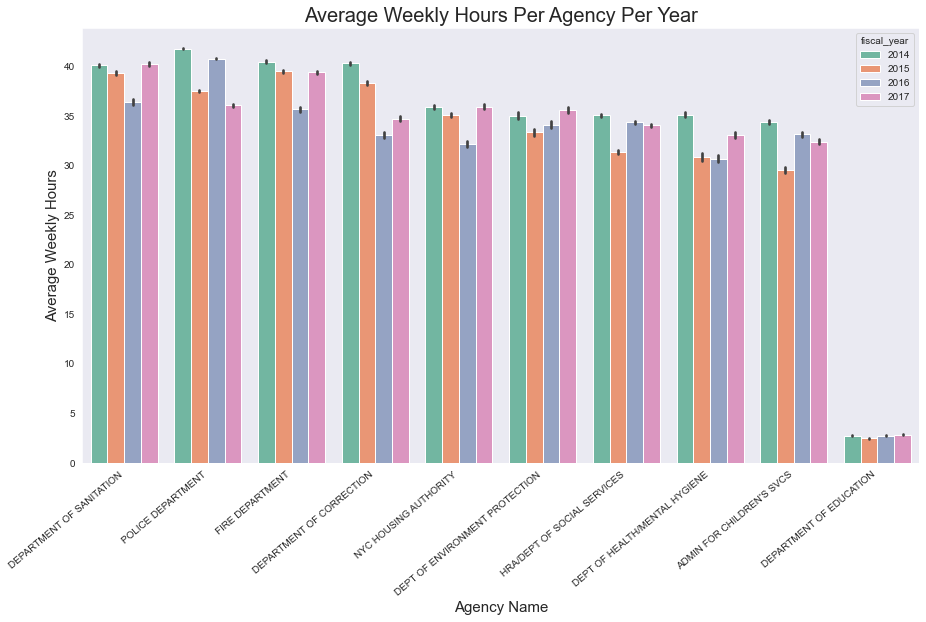

In [52]:
#AVERAGE WEEKLY HOURS PER AGENCY PER YEAR 
plt.figure(figsize=(15,8))
weekly_hrs_year=sns.barplot( 
data=ny_payroll, 
x='agency_name',
y='avg_weekly_hours',
hue='fiscal_year',
order= ny_payroll.groupby('agency_name').avg_weekly_hours.mean().sort_values(ascending=False).index)
weekly_hrs_year.set_xticklabels(weekly_hrs_year.get_xticklabels(), rotation=40, ha="right")
plt.title('Average Weekly Hours Per Agency Per Year',fontsize=20)
plt.xlabel('Agency Name', fontsize=15)
plt.ylabel('Average Weekly Hours',fontsize=15)

([<matplotlib.axis.YTick at 0x7fd486ea2c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

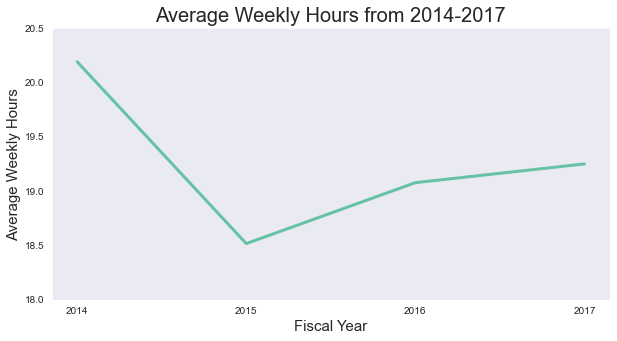

In [106]:
#AVERAGE WEEKLY HOURS FROM 2014-2017
plt.figure(figsize=(10,5))
sns.lineplot( 
data=ny_payroll, 
x='fiscal_year',
y='avg_weekly_hours',
lw=3,
ci=None)
plt.title('Average Weekly Hours from 2014-2017',fontsize=20)
plt.xlabel('Fiscal Year',fontsize=15)
plt.ylabel('Average Weekly Hours', fontsize=15)
plt.xticks([2014,2015,2016,2017])
plt.yticks([18,18.5,19,19.5,20,20.5,])

([<matplotlib.axis.XTick at 0x7fd4e915a5e0>,
 [Text(2013.5, 0, '2013.5'),
  Text(2014.0, 0, '2014.0'),
  Text(2014.5, 0, '2014.5'),
  Text(2015.0, 0, '2015.0')])

<Figure size 1080x576 with 0 Axes>

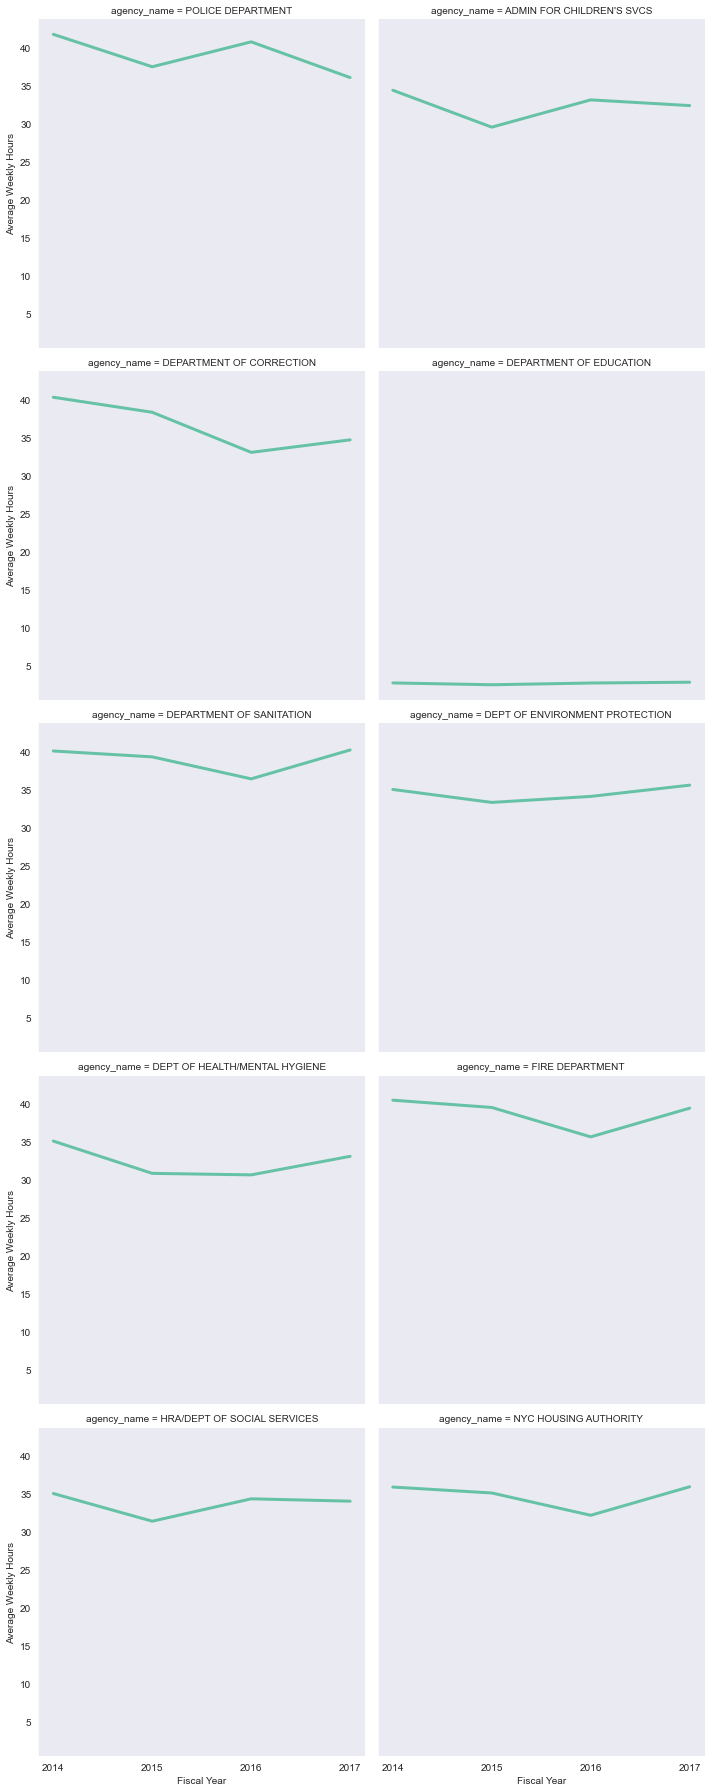

In [54]:
#AVERAGE WEEKLY HOURS FROM 2014-2017 FOR EACH AGENCY 
plt.figure(figsize=(15,8))
hours_agency= sns.relplot( 
kind='line',
data=ny_payroll, 
x='fiscal_year',
y='avg_weekly_hours',
ci=None, 
col='agency_name',
col_wrap=2,
    lw=3
)

hours_agency.set_axis_labels("Fiscal Year", "Average Weekly Hours")
plt.xticks([2014,2015,2016,2017])